In [10]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import pickle
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, LSTM
from keras.layers import MaxPooling2D,Conv2D, ZeroPadding2D
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
%matplotlib inline

In [11]:
# Data loading + reshape to 4D
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape


(60000, 1, 28, 28)

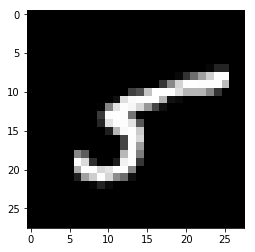

In [12]:
plt.imshow(np.squeeze(X_train[65]), cmap='gray')

In [13]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]


(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [14]:
# choose any image to want by specifying the index
img_to_visualize = X_train[65]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [15]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)
    return convolutions

In [16]:
# Model 

list=[]
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(1,28,28))) 
convout1 = Activation('relu')
list.append(convout1)

convout2=Convolution2D(32, 3, 3, input_shape=(1,28,28))
list.append(convout2)

convout3 = MaxPooling2D()
list.append(convout3)

pickle_out = open('datafinal.pickle','wb')
pickle.dump(list,pickle_out,protocol=4)
pickle_out.close()

model.add(convout1)

model.add(convout2)

model.add(convout3)

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

C:\Users\TejasviniAditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28...)`
  
C:\Users\TejasviniAditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28...)`
  # Remove the CWD from sys.path while we load stuff.


In [17]:
data1='C:\\Users\\TejasviniAditya\\Documents\\Python Scripts\\datafinal.pickle'
pickle_in=open(data1,'rb')
outputList= pickle.load(pickle_in)
print(outputList)


[<keras.layers.core.Activation object at 0x000001F576B81A20>, <keras.layers.convolutional.Conv2D object at 0x000001F577DA7BE0>, <keras.layers.pooling.MaxPooling2D object at 0x000001F57A224978>]


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 26, 26)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
__________

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=5, validation_data=(X_test, Y_test))

C:\Users\TejasviniAditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 492s 8ms/step - loss: 0.2055 - acc: 0.9389 - val_loss: 0.0597 - val_acc: 0.9805
Epoch 2/5
60000/60000 [==============================] - 368s 6ms/step - loss: 0.0595 - acc: 0.9812 - val_loss: 0.0371 - val_acc: 0.9867
Epoch 3/5
60000/60000 [==============================] - 365s 6ms/step - loss: 0.0384 - acc: 0.9881 - val_loss: 0.0359 - val_acc: 0.9872
Epoch 4/5
60000/60000 [==============================] - 363s 6ms/step - loss: 0.0310 - acc: 0.9896 - val_loss: 0.0320 - val_acc: 0.9896
Epoch 5/5
60000/60000 [==============================] - 363s 6ms/step - loss: 0.0242 - acc: 0.9924 - val_loss: 0.0423 - val_acc: 0.9884


In [22]:
# choose any image to want by specifying the index
img_to_visualize = X_train[65]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [23]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)
    

    print ('Shape of convolution Layer:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')
        
    for i in range(len(convolutions)):
        print(convolutions[i])
        

Shape of convolution Layer: (32, 24, 24)
[[-0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933]
 [-0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933]
 [-0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933
  -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933]
 [-0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.04013933 -0.040

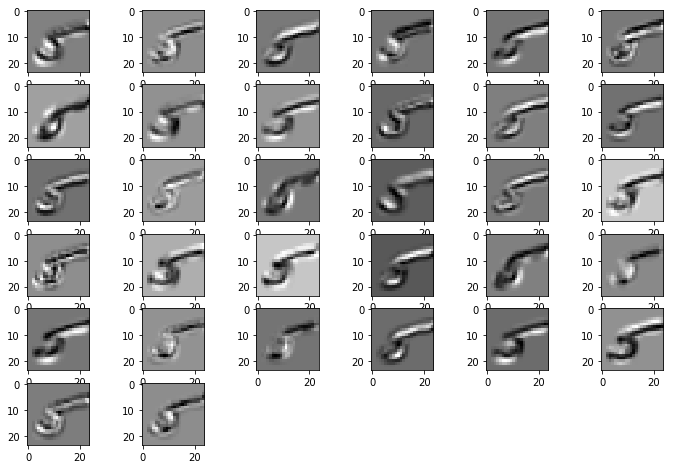

In [24]:
layer_to_visualize(convout2)